<a href="https://colab.research.google.com/github/DonRoboto/MOO_v1/blob/main/T2_P2_P3_EA_version1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bitstring


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import random
import bitstring as bits
from sympy import *
import scipy, pylab
import matplotlib.pyplot as plt

In [3]:
class Funcion_P1_F1():
    def Eval(self, X):
        x1 = X[0][0]
        x2 = X[1][0]
        f =  (x1-1)**2 + (x2-1)**4
        return f



In [4]:
class Funcion_P1_F2():
    def Eval(self, X):
        x1 = X[0][0]
        x2 = X[1][0]
        f =  (x1+1)**2 + (x2+1)**2
        return f

In [18]:
class Funcion_P2_F1():
    def Eval(self, X):
        x1 = X[0][0]
        x2 = X[1][0]
        gamma = 0.7
        f = 0.5 * (( ( 1 + (x1 + x2)**2 )**0.5 ) + ( ( 1 + (x1 - x2)**2 )**0.5 ) + x1 - x2) + gamma * exp(-(x1-x2)**2)
        return f


In [19]:
class Funcion_P2_F2():
    def Eval(self, X):
        x1 = X[0][0]
        x2 = X[1][0]
        gamma = 0.7
        f = 0.5 * (( ( 1 + (x1 + x2)**2 )**0.5 ) + ( ( 1 + (x1 - x2)**2 )**0.5 ) - x1 + x2) + gamma * exp(-(x1-x2)**2)
        return f

In [20]:
class Individuo():

    def __init__(self, rango, x='', y=''):
      self.rango=rango
      if x!='':
        if np.abs(x)>self.rango:
          self.f_x = round(random.uniform(-self.rango, self.rango),2)
        else:
          self.f_x = float(x)

        if np.abs(y)>self.rango:
          self.f_y = round(random.uniform(-self.rango, self.rango),2)
        else:
          self.f_y = float(y)

      else:
        self.f_x = round(random.uniform(-self.rango, self.rango),2)
        self.f_y = round(random.uniform(-self.rango, self.rango),2)
      
      self.cromosomas()

      #FUNCIONES
      self.fx_1 = Funcion_P2_F1()
      self.fx_2 = Funcion_P2_F2()

      #self.fx = (0.5*self.fx_1)+(0.5*self.fx_2)

    def cromosomas(self):
        aux_f_x = bits.BitArray(float=self.f_x, length=32)
        aux_f_y = bits.BitArray(float=self.f_y, length=32)

        self.b_x = list(aux_f_x.bin)
        self.b_y = list(aux_f_y.bin)
 

    def fittnes(self, w1, w2):
      r1_1 = ''.join(self.b_x)
      r1_2 = ''.join(self.b_y)

      r2_1 = bits.BitArray(bin=r1_1).float
      r2_2 = bits.BitArray(bin=r1_2).float

      if np.abs(r2_1)>self.rango  or np.abs(r2_2)>self.rango :
        result = 10000000
      else:
        ev_f1 = self.fx_1.Eval(np.array([[r2_1], [r2_2]]))
        ev_f2 = self.fx_2.Eval(np.array([[r2_1], [r2_2]]))
        result = (w1 * ev_f1 ) + (w2 * ev_f2 )

      return result

In [21]:
class Poblacion():
  p = []

  def __init__(self, n='', rango=2):
    self.p = []
    self.rango=rango

    if n!='':
      for k in range(n):
        i=Individuo(rango=self.rango)
        self.p.append(i)


  def cruza(self, ind_1, ind_2):
    cro1_1 = ind_1.b_x
    cro1_2 = ind_1.b_y

    cro2_1 = ind_2.b_x
    cro2_2 = ind_2.b_y

    cruza1_x_top = cro1_1[:16]
    cruza1_x_bot = cro1_1[16:]

    cruza1_y_top = cro1_2[:16]
    cruza1_y_bot = cro1_2[16:]

    cruza2_x_top = cro2_1[:16]
    cruza2_x_bot = cro2_1[16:]

    cruza2_y_top = cro2_2[:16]
    cruza2_y_bot = cro2_2[16:]

    hijo_1_x = cruza1_x_top + cruza2_x_bot
    hijo_1_y = cruza1_y_top + cruza2_y_bot

    hijo_2_x = cruza2_x_top + cruza1_x_bot
    hijo_2_y = cruza2_y_top + cruza1_y_bot

    ch_1_x = hijo_1_x
    ch_1_y = hijo_1_y

    chs_1_x = ''.join(ch_1_x)
    chs_1_y = ''.join(ch_1_y)

    h1_2_1 = bits.BitArray(bin=chs_1_x)
    h1_2_2 = bits.BitArray(bin=chs_1_y)
      
    h1_3_1 = h1_2_1.float
    h1_3_2 = h1_2_2.float

    ch_2_x = hijo_2_x
    ch_2_y = hijo_2_y

    chs_2_x = ''.join(ch_2_x)
    chs_2_y = ''.join(ch_2_y)

    h2_2_1 = bits.BitArray(bin=chs_2_x)
    h2_2_2 = bits.BitArray(bin=chs_2_y)
      
    h2_3_1 = h2_2_1.float
    h2_3_2 = h2_2_2.float

    hijo_1 = Individuo(rango=self.rango, x=h1_3_1, y=h1_3_2)
    hijo_2 = Individuo(rango=self.rango, x=h2_3_1, y=h2_3_2)

    return hijo_1, hijo_2 


  def mutacion(self, ind_1):
    index = random.randint(0, 31)

    c_aux_1 = ind_1.b_x[index]
    c_aux_2 = ind_1.b_y[index]

    if c_aux_1=='0':
      ind_1.b_x[index]='1'
    else:
      ind_1.b_x[index]='0'

    if c_aux_2=='0':
      ind_1.b_y[index]='1'
    else:
      ind_1.b_y[index]='0'

In [22]:
#crear pesos
w1 = [i/100 for i in range(0, 101)]
w2=[]

for i in range(len(w1)):
  w2.append(round(1-w1[i],2))


In [10]:
result = []

for iter in range(len(w1)):

  pob_i = Poblacion(n=24, rango=3)

  for m in range(20):
    pob_n = Poblacion()
    pob_aux = Poblacion()


    #seleccionar los que se van a reproducir por torneo binario
    for i in range(0, len(pob_i.p), 2):
      if pob_i.p[i].fittnes(w1[iter], w2[iter])<= pob_i.p[i+1].fittnes(w1[iter], w2[iter]):
        pob_aux.p.append(pob_i.p[i])
      else:
        pob_aux.p.append(pob_i.p[i+1])   

    #quenes serán padres
    pad_1 = Individuo(rango=3)
    pad_2 = Individuo(rango=3)

    for j in range(0, len(pob_aux.p), 2):
      pad_1 = pob_aux.p[j]
      pad_2 = pob_aux.p[j+1]

      pob_n.p.append(pad_1)
      pob_n.p.append(pad_2)

      #cruza
      h_1, h_2 = pob_n.cruza(pad_1, pad_2)

     #mutacion
      if random.uniform(0, 1)<0.1:
        pob_n.mutacion(h_1)

      if random.uniform(0, 1)<0.1:
        pob_n.mutacion(h_2)

      pob_n.p.append(h_1)
      pob_n.p.append(h_2)

   
  for i in pob_n.p:
    result.append([i.f_x, i.f_y])


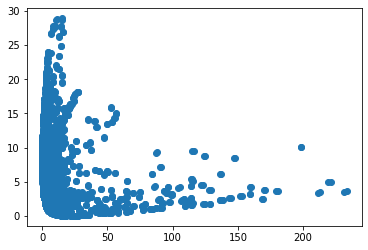

In [11]:
graph_1 = []
graph_2 = []

fn1 = Funcion_P1_F1()
fn2 = Funcion_P1_F2()

for k in result:
  x1 = k[0]
  x2 = k[1]
  
  xk = np.array([[x1], [x2]])

  ev1 = fn1.Eval(xk)
  ev2 = fn2.Eval(xk)

  graph_1.append(ev1)
  graph_2.append(ev2)


plt.scatter(graph_1, graph_2)
plt.show()

In [23]:
result = []

for iter in range(len(w1)):

  pob_i = Poblacion(n=24, rango=2)

  for m in range(20):
    pob_n = Poblacion()
    pob_aux = Poblacion()


    #seleccionar los que se van a reproducir por torneo binario
    for i in range(0, len(pob_i.p), 2):
      if pob_i.p[i].fittnes(w1[iter], w2[iter])<= pob_i.p[i+1].fittnes(w1[iter], w2[iter]):
        pob_aux.p.append(pob_i.p[i])
      else:
        pob_aux.p.append(pob_i.p[i+1])   

    #quenes serán padres
    pad_1 = Individuo(rango=2)
    pad_2 = Individuo(rango=2)

    for j in range(0, len(pob_aux.p), 2):
      pad_1 = pob_aux.p[j]
      pad_2 = pob_aux.p[j+1]

      pob_n.p.append(pad_1)
      pob_n.p.append(pad_2)

      #cruza
      h_1, h_2 = pob_n.cruza(pad_1, pad_2)

     #mutacion
      if random.uniform(0, 1)<0.1:
        pob_n.mutacion(h_1)

      if random.uniform(0, 1)<0.1:
        pob_n.mutacion(h_2)

      pob_n.p.append(h_1)
      pob_n.p.append(h_2)

   
  for i in pob_n.p:
    result.append([i.f_x, i.f_y])


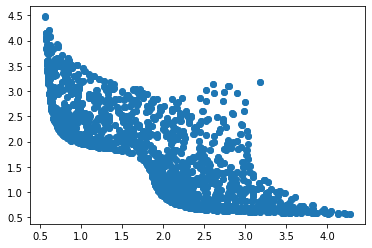

In [24]:
graph_1 = []
graph_2 = []

fn1 = Funcion_P2_F1()
fn2 = Funcion_P2_F2()

for k in result:
  x1 = k[0]
  x2 = k[1]
  
  xk = np.array([[x1], [x2]])

  ev1 = fn1.Eval(xk)
  ev2 = fn2.Eval(xk)

  graph_1.append(ev1)
  graph_2.append(ev2)


plt.scatter(graph_1, graph_2)
plt.show()